***What is Dimensionality Reduction and why is it used..??***


Dimensionality reduction is a process of transforming data from a high-dimensional space into a low-dimensional space, while preserving the most important information
for examply converting (3D to 2D or 1D).
We use this technique to

*   Simplify complex data
*   Making it easier to analyze and visualize.
*   Reduces overfitting
*   Enhance the interpretability of machine learning models.




---



# **Dimensionality Reduction Techniques**

In [189]:
"""
Method	  Type	                          Supervised?	     Primary Purpose	                                    Analogy / Intuition
PCA 	    Linear Projection	              No	             Find orthogonal axes capturing                       Rotating a paper to see the direction of
                                                           maximum variance in data	                            the widest data spread


LDA 	    Linear Projection	              Yes	             Maximize class separability by 	                    Splitting fruits based on sweetness and color for better categorization
                                                           projecting onto discriminative directions


t-SNE 	  Non-linear Manifold Learning	  No	             Visualizing high-dimensional data by preserving      Untangling a ball of colored threads to see clusters clearly
                                                           local structure in 2D/3D


UMAP 	    Non-linear Manifold Learning	  No	             Dimensionality reduction and visualization           Flattening a complex city into an easily navigable map
                                                           preserving both local and global structure           while keeping neighborhoods intact



SVD 	    Linear Matrix Factorization	    No	             Matrix decomposition for dimensionality reduction,   Compressing a Netflix movie rating matrix into essential latent features
                                                           noise filtering, and latent factor discovery
"""

'\nMethod\t  Type\t                          Supervised?\t     Primary Purpose\t                                    Analogy / Intuition\nPCA \t    Linear Projection\t              No\t             Find orthogonal axes capturing                       Rotating a paper to see the direction of \n                                                           maximum variance in data\t                            the widest data spread\n\n\nLDA \t    Linear Projection\t              Yes\t             Maximize class separability by \t                    Splitting fruits based on sweetness and color for better categorization\n                                                           projecting onto discriminative directions\n\n\nt-SNE \t  Non-linear Manifold Learning\t  No\t             Visualizing high-dimensional data by preserving      Untangling a ball of colored threads to see clusters clearly\n                                                           local structure in 2D/3D\t\n\n\nUMAP \t 

In [190]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [191]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from time import time
from sklearn.manifold import trustworthiness
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [192]:
data = load_breast_cancer()

In [193]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [194]:
df['target'] = data.target

In [195]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **Scaling the data**

In [196]:
X = df.drop("target",axis=1)
y = df['target']

In [197]:
st = StandardScaler()

In [198]:
X_scaled = st.fit_transform(X)

# **PCA**

In [199]:
from sklearn.decomposition import PCA

In [200]:
start = time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
end = time()
pca_runtime = (end-start)

Text(0, 0.5, 'Second Principal Component')

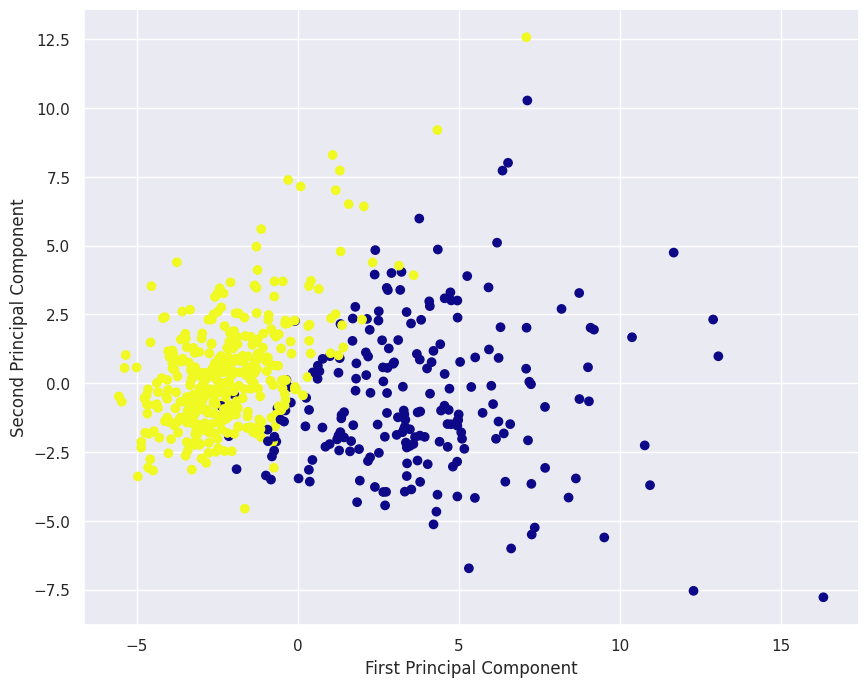

In [201]:
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [227]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

# **LDA**

In [203]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [204]:
start = time()
lda = LinearDiscriminantAnalysis(n_components=1) #there are only two classes
X_lda = lda.fit_transform(X_scaled,y)
end = time()
lda_runtime = (end-start)

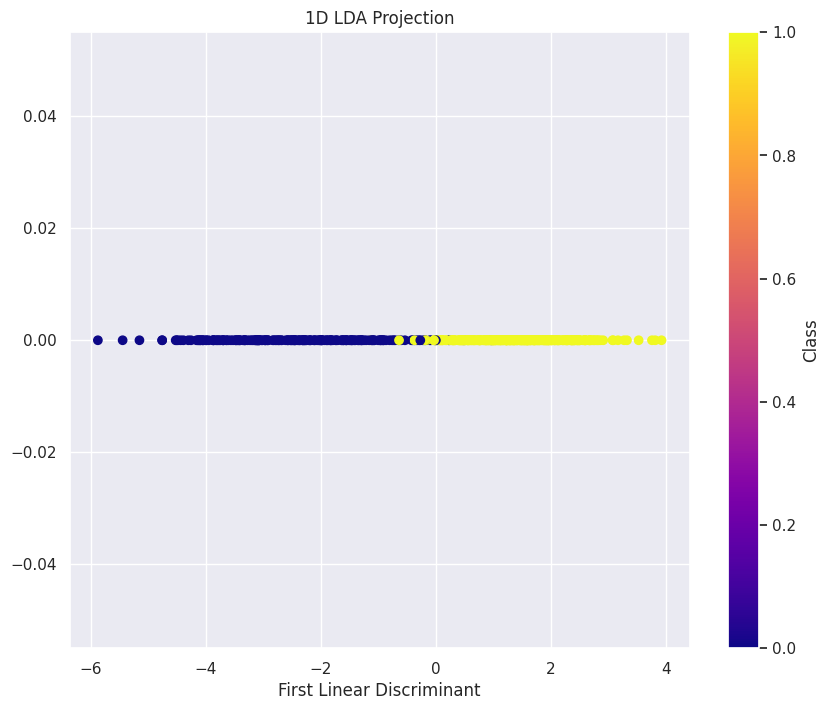

In [205]:
plt.figure(figsize=(10,8))
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='plasma')
plt.xlabel('First Linear Discriminant')
plt.title('1D LDA Projection')
plt.colorbar(label='Class')
plt.show()

In [206]:
start = time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # No y needed
end = time()

# **T-SNE**

In [207]:
from sklearn.manifold import TSNE

In [208]:
start = time()
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)
end = time()
tsne_runtime = (abs(end-start))

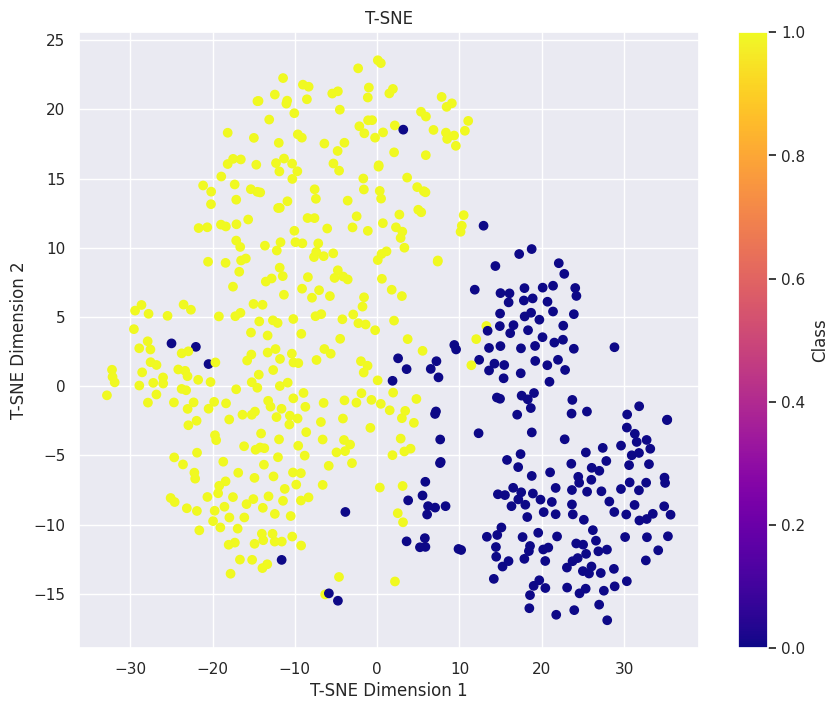

In [209]:
plt.figure(figsize=(10,8))
plt.scatter(X_tsne[:, 0], X_tsne[:,1], c=y, cmap='plasma')
plt.xlabel('T-SNE Dimension 1')
plt.ylabel('T-SNE Dimension 2')
plt.title('T-SNE')
plt.colorbar(label='Class')
plt.show()

# **UMAP**

In [210]:
from umap import UMAP

In [211]:
start = time()
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X_scaled)
end = time()
umap_runtime = (end-start)

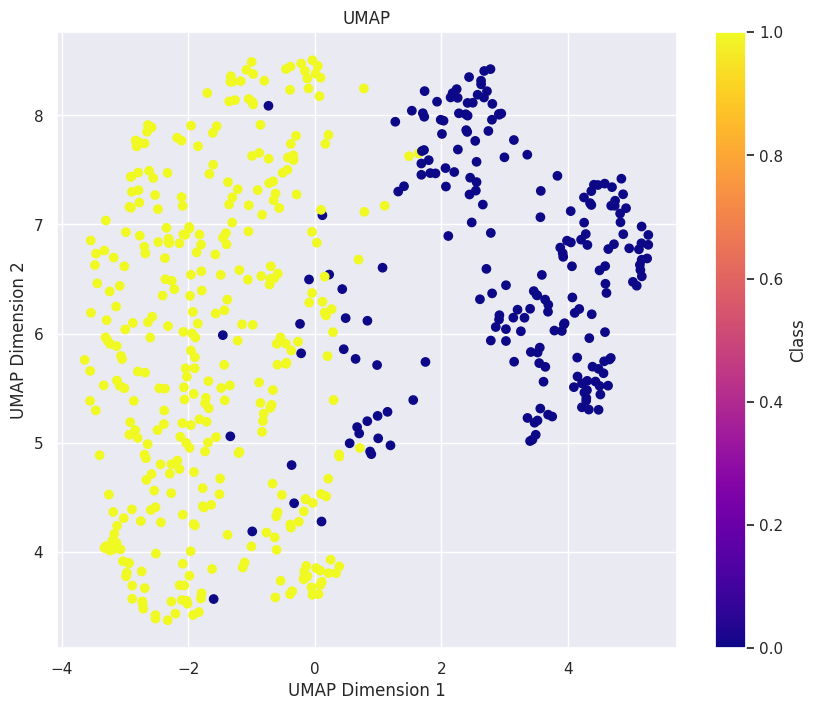

In [212]:
plt.figure(figsize=(10,8))
plt.scatter(X_umap[:, 0], X_umap[:,1], c=y, cmap='plasma')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP')
plt.colorbar(label='Class')
plt.show()

# **SVD**

In [213]:
from sklearn.decomposition import TruncatedSVD

In [214]:
start = time()
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)
end = time()
svd_runimte = (end-start)

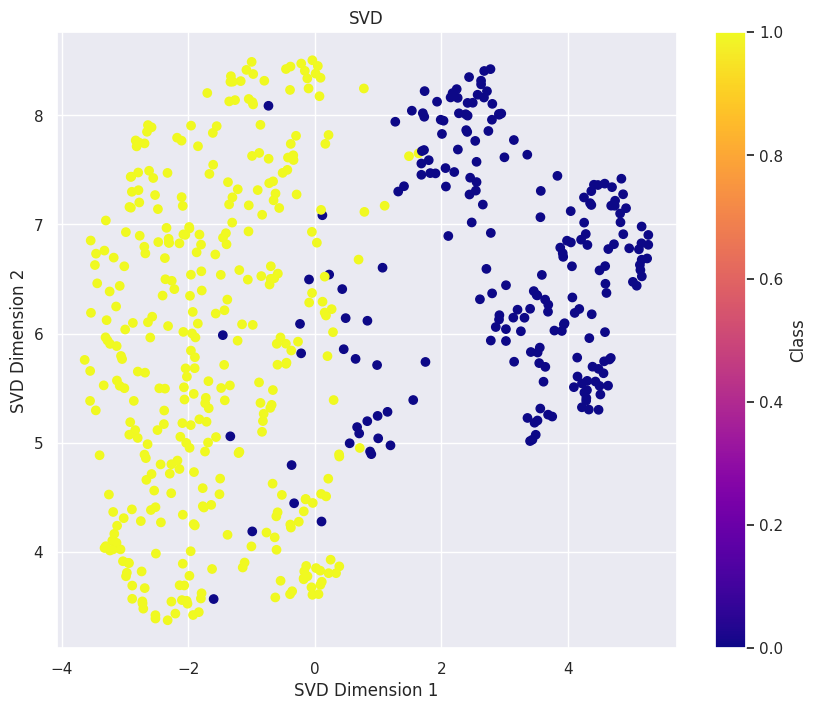

In [215]:
plt.figure(figsize=(10,8))
plt.scatter(X_umap[:, 0], X_umap[:,1], c=y, cmap='plasma')
plt.xlabel('SVD Dimension 1')
plt.ylabel('SVD Dimension 2')
plt.title('SVD')
plt.colorbar(label='Class')
plt.show()

# **Side by Side charts of PCA,LDA,T-SNE,UMAP,SVD**

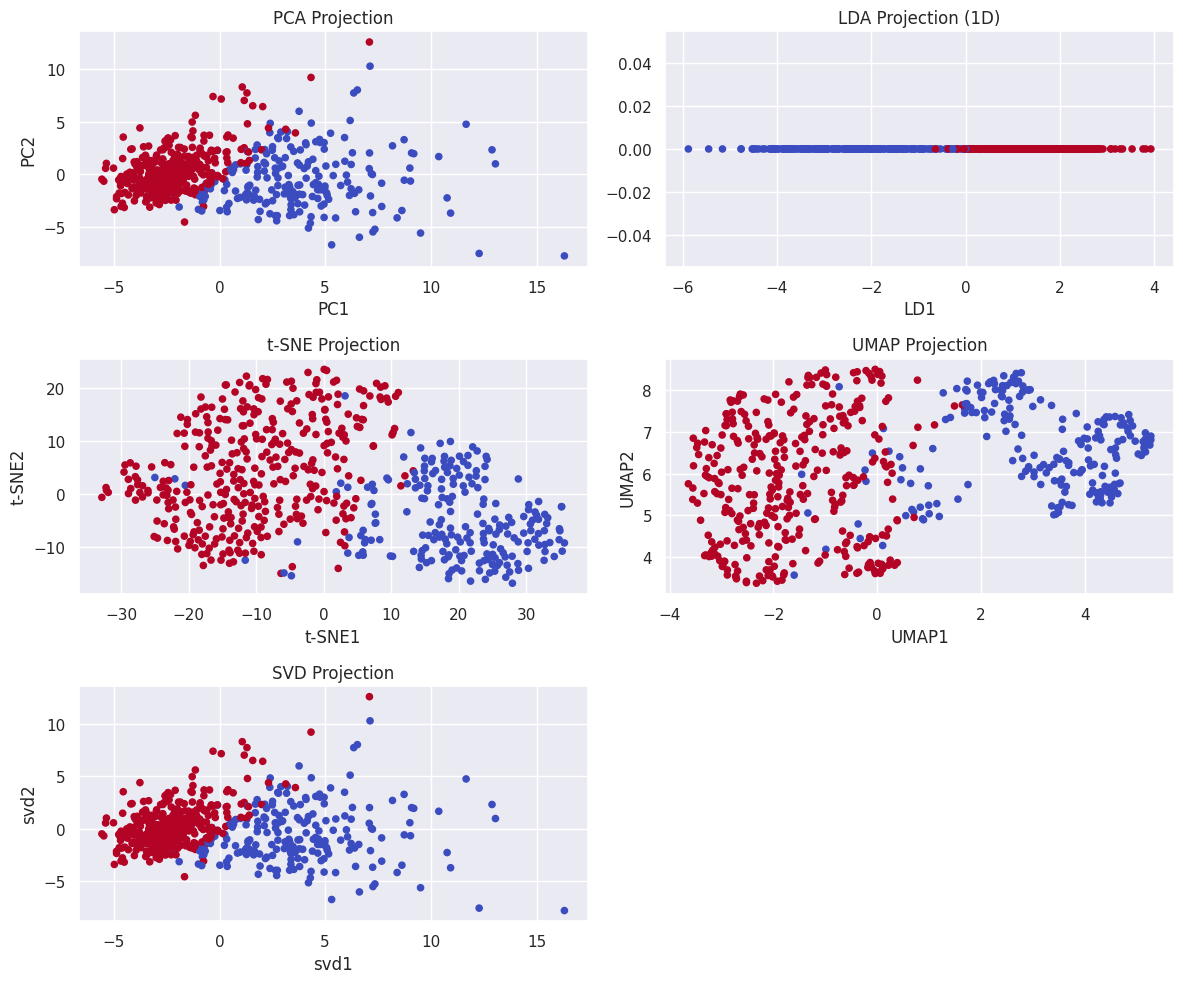

In [216]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=20)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(3, 2, 2)
plt.scatter(X_lda[:, 0], [0]*len(X_lda), c=y, cmap='coolwarm', s=20)
plt.title('LDA Projection (1D)')
plt.xlabel('LD1')
plt.ylabel('')

plt.subplot(3, 2, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=20)
plt.title('t-SNE Projection')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.subplot(3, 2, 4)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
plt.title('UMAP Projection')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.subplot(3, 2, 5)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='coolwarm', s=20)
plt.title('SVD Projection')
plt.xlabel('svd1')
plt.ylabel('svd2')

plt.tight_layout()
plt.show()


In [217]:
runtime = {
    'PCA': pca_runtime,
    'LDA': lda_runtime,
    't-SNE': tsne_runtime,
    'UMAP': umap_runtime,
    'SVD': svd_runtime
}

In [218]:
runtime_df = pd.DataFrame(list(runtime.items()), columns=['Technique', 'Runtime (s)'])


In [219]:
runtime_df.sort_values(by='Runtime (s)', ascending=True)

,Technique,Runtime (s)
4,SVD,0.003680
0,PCA,0.005026
1,LDA,0.015576
3,UMAP,1.909303
2,t-SNE,3.861605


In [220]:
trust_pca = trustworthiness(X_scaled, X_pca, n_neighbors=2)
trust_lda = None
trust_tsne = trustworthiness(X_scaled, X_tsne, n_neighbors=2)
trust_umap = trustworthiness(X_scaled, X_umap, n_neighbors=2)
trust_svd = trustworthiness(X_scaled, X_svd, n_neighbors=2)

print("PCA:", trust_pca)
print("t-SNE:", trust_tsne)
print("UMAP:", trust_umap)
print("SVD:", trust_svd)

PCA: 0.8647494557439409
t-SNE: 0.9870233194880186
UMAP: 0.9447741317931003
SVD: 0.8647494557439409


# **KMeans Model**

In [221]:
kmeans = KMeans(n_clusters=2,random_state=42)


kmeans.fit(X_pca)
pred_pca = kmeans.predict(X_pca)


kmeans.fit(X_umap)
pred_umap = kmeans.predict(X_umap)


kmeans.fit(X_tsne)
pred_tsne = kmeans.predict(X_tsne)


kmeans.fit(X_svd)
pred_svd = kmeans.predict(X_svd)

# **Silhoutte Score**

In [222]:
silhoutte_pca = silhouette_score(X_pca, pred_pca)
silhoutte_lda = None
silhoutte_umap = silhouette_score(X_umap, pred_umap)
silhoutte_tsne = silhouette_score(X_tsne, pred_tsne)
silhoutte_svd = silhouette_score(X_svd, pred_svd)

In [223]:
print(f"PCA Silhouette Score: {silhoutte_pca}")
print(f"UMAP Silhouette Score: {silhoutte_umap}")
print(f"t-SNE Silhouette Score: {silhoutte_tsne}")
print(f"SVD Silhouette Score: {silhoutte_svd}")

PCA Silhouette Score: 0.5084690190672024
UMAP Silhouette Score: 0.5659819841384888
t-SNE Silhouette Score: 0.5106432437896729
SVD Silhouette Score: 0.5084690190635189


# **Comparison**

In [224]:
result = {
    'PCA': [pca_runtime,trust_pca,silhoutte_pca],
    'LDA': [lda_runtime,trust_lda,silhoutte_lda],
    't-SNE': [tsne_runtime,trust_tsne,silhoutte_tsne],
    'UMAP': [umap_runtime,trust_umap,silhoutte_umap],
    'SVD': [svd_runtime,trust_svd,silhoutte_svd]
}

In [225]:
compare_df = pd.DataFrame(result,index=['Runtime (s)','Trustworthiness','Silhouette Score']).T

In [230]:
compare_df

,Runtime (s),Trustworthiness,Silhouette Score
PCA,0.005026,0.864749,0.508469
LDA,0.015576,NaN,NaN
t-SNE,3.861605,0.987023,0.510643
UMAP,1.909303,0.944774,0.565982
SVD,0.003680,0.864749,0.508469


In [237]:
compare_df = compare_df.reset_index().rename(columns={'index':'Method'})

In [238]:
compare_df

,Method,Runtime (s),Trustworthiness,Silhouette Score
0,PCA,0.005026,0.864749,0.508469
1,LDA,0.015576,NaN,NaN
2,t-SNE,3.861605,0.987023,0.510643
3,UMAP,1.909303,0.944774,0.565982
4,SVD,0.003680,0.864749,0.508469


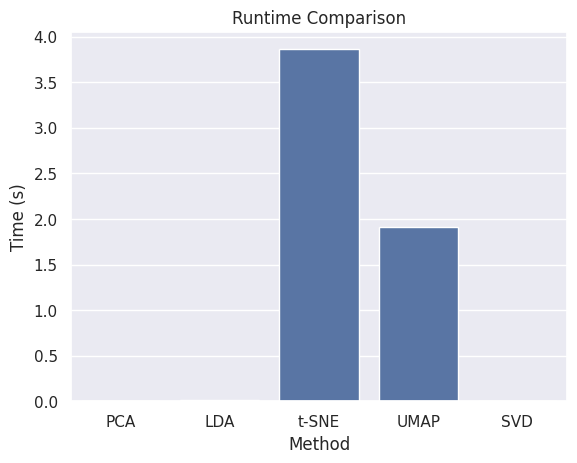

In [241]:
sns.barplot(x='Method', y='Runtime (s)', data=compare_df)
plt.title("Runtime Comparison")
plt.ylabel("Time (s)")
plt.xticks(rotation=0)
plt.show()

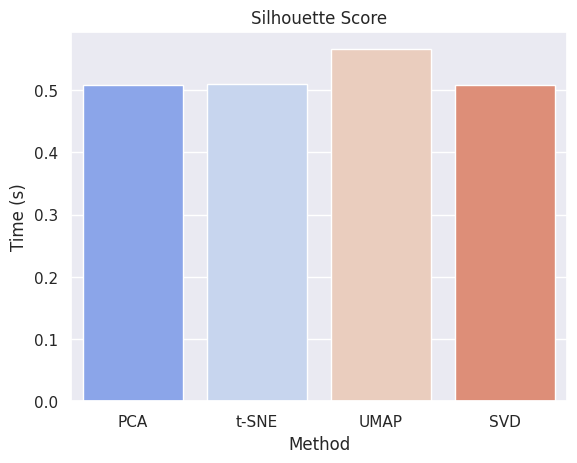

In [246]:
sns.barplot(x='Method', y='Silhouette Score', data=compare_df[compare_df['Method']!='LDA'],palette='coolwarm')
plt.title("Silhouette Score")
plt.ylabel("Time (s)")
plt.xticks(rotation=0)
plt.show()